In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data_set = pd.read_csv('chocolate data.txt', sep='\t', index_col=False, header=0)

In [3]:
data_set.head()

,weight,cocoa_percent,sugar_percent,milk_percent,customer_happiness
0,185,65,11,24,47
1,247,44,34,22,55
2,133,33,21,47,35
3,145,30,38,32,34
4,110,22,70,7,40


In [4]:
def linear_regression(formula):
    lm = smf.ols(formula=formula, data=data_set).fit()
    feature_name = formula.split(' ')[-1]
    print('Feature name = ', feature_name)
    train_x = data_set[feature_name]
    intercept = lm.params[0]
    slope = lm.params[1]
    print(intercept, slope)
    line = slope * train_x + intercept
    plt.scatter(train_x, data_set.customer_happiness)
    plt.plot(train_x, line, '-', c='red')
    plt.xlabel(feature_name)
    plt.ylabel('Customer_happiness')
    plt.show()

Feature name =  cocoa_percent
25.237026904809106 0.3416018064811027


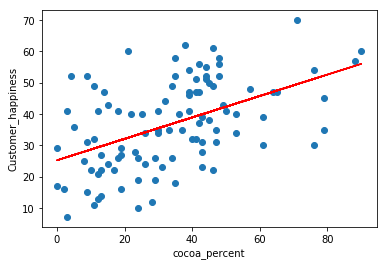

In [5]:
linear_regression('customer_happiness ~ cocoa_percent')

Feature name =  weight
17.096017620806858 0.15015235116798686


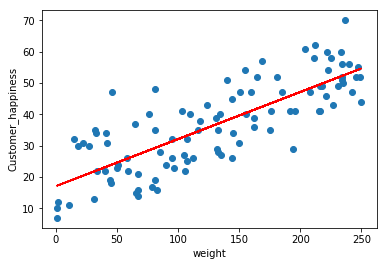

In [6]:
linear_regression('customer_happiness ~ weight')

Feature name =  sugar_percent
46.2165545484073 -0.2790572690469894


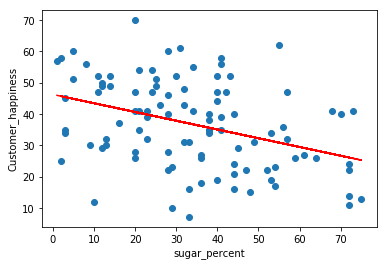

In [7]:
linear_regression('customer_happiness ~ sugar_percent')

Feature name =  milk_percent
40.52257892272318 -0.11502554461396532


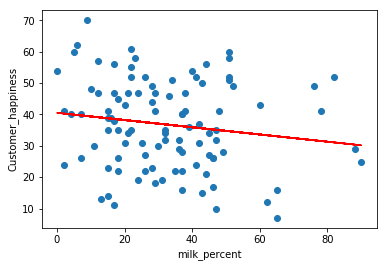

In [8]:
linear_regression('customer_happiness ~ milk_percent')

Conclusion: Customer happiness increase in increase of weight or cocoa_percent

Multiple Linear Regression

In [9]:
data_set = pd.read_csv('chocolate data multiple linear regression.txt', index_col=False, header=0, sep='\t')

In [10]:
data_set.head()

,weight,cocoa_percent,cost,customer_happiness
0,247,0.11,0.25,29
1,192,0.82,10.44,29
2,106,0.01,0.00,6
3,78,0.04,0.01,4
4,213,0.39,2.56,30


In [11]:
def multiple_regression(formula):
    lm = smf.ols(formula=formula, data=data_set).fit()
    feature_name = formula.split(' ')[-1]
    print(feature_name)
    intercept = lm.params[0]
    slope = lm.params[1]
    print(intercept, slope)
    line = slope * data_set[feature_name] + intercept
    print(lm.rsquared)
    plt.scatter(data_set[feature_name], data_set.customer_happiness)
    plt.plot(data_set[feature_name], line, '-', c='red')
    plt.xlabel(feature_name)
    plt.ylabel('Customer happiness')
    plt.show()

cocoa_percent
10.110362705904741 15.448921811252577
0.2686562634619112


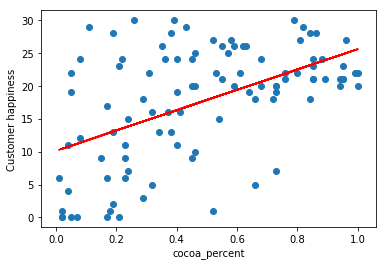

In [12]:
multiple_regression('customer_happiness ~ cocoa_percent')

weight
6.697878900496896 0.07033626515808454
0.1887701234022121


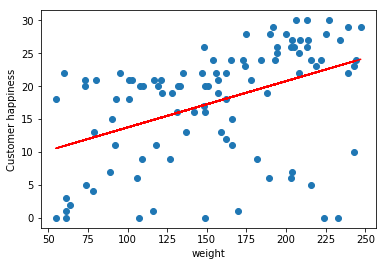

In [13]:
multiple_regression('customer_happiness ~ weight')

cost
13.323091789381653 1.1160451465524621
0.24243472405017064


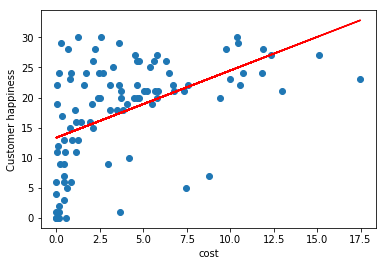

In [14]:
multiple_regression('customer_happiness ~ cost')

In [18]:
formula = 'customer_happiness ~ weight + cocoa_percent + cost'
lm = smf.ols(formula=formula, data=data_set).fit()
print(lm.params)

Intercept        -9.338917
weight            0.106411
cocoa_percent    31.935786
cost             -1.314457
dtype: float64


In [19]:
print(lm.rsquared)

0.5554156557713101


In [20]:
print(lm.params)

Intercept        -9.338917
weight            0.106411
cocoa_percent    31.935786
cost             -1.314457
dtype: float64
